In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ntu_par = {}
ntu_par['limbSeq'] = [[1, 2], [2, 21], [3, 21], [4, 3], [5, 21],
                              [6, 5], [7, 6], [8, 7], [9, 21], [10, 9],
                              [11, 10], [12, 11], [13, 1], [14, 13], [15, 14],
                              [16, 15], [17, 1], [18, 17], [19, 18], [20, 19],
                              [22, 23], [23, 8], [24, 25], [25, 12]]
# ntu_par['limbSeq'] = [[1, 2], [2, 21], [3, 21], [4, 3], [5, 21],
#                               [6, 5], [7, 6], [9, 21], [10, 9],
#                               [11, 10], [13, 1], [14, 13], [15, 14],
#                               [16, 15], [17, 1], [18, 17], [19, 18], [20, 19]]
ntu_par['colors'] = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0],
          [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255],
          [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [170, 0, 85], [85, 0, 170], [85, 255, 85], [0, 0, 170], [170, 0, 0],
                   [85,85,85], [255,0,85]]
ntu_par['height'] = 350
ntu_par['width'] = 256

In [3]:
data_path = '/home/wuqiang/Workspace/2_generative_model/3_DA_Gesture/2_ST_GCN/st-gcn-master/data/NTU-RGB-D/xsub/val_data.npy'
data = np.load(data_path, mmap_mode='r')
data.shape

(16487, 3, 300, 25, 2)

In [33]:
frame_item = data[0,:,:,:,:]
frame_item.shape

(3, 300, 25, 2)

In [131]:
def frame_visu_3d(frame_item, par_dict):
    limbSeq = par_dict['limbSeq']
    x_list = list(frame_item[0])
    y_list = list(frame_item[1])
    z_list = list(frame_item[2])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(limbSeq)):
        A_idx = limbSeq[i][0] - 1
        B_idx = limbSeq[i][1] - 1
        x_p = [x_list[A_idx],x_list[B_idx]]
        y_p = [y_list[A_idx],y_list[B_idx]]
        z_p = [z_list[A_idx],z_list[B_idx]]
        ax.plot(x_p, y_p, zs=z_p)
    ax.scatter(x_list,y_list,z_list,c='r',marker='o')

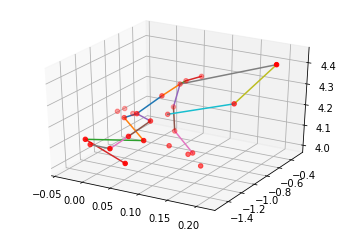

In [132]:
frame_visu_3d(frame_item, ntu_par)

In [101]:
def frame_visu_2d(frame_item, frame_id_list):
    C, T, V, M = frame_item.shape
    connecting_joint = np.array([2, 1, 21, 3, 21, 5, 6, 7, 21, 9, 10, 11, 1, 13, 14, 15, 1, 17, 18, 19, 2, 8, 8, 12, 12]) - 1
    location = frame_item[:,frame_id_list,:,:]
    
    plt.figure()
    for _, t in enumerate(frame_id_list):
        print(t)
        plt.cla()
        plt.xlim(-1000, 2000)
        plt.ylim(-2000, 2000)
        for m in range(M):
            x = frame_item[0,t,:,m] * 1080
            y = (frame_item[1,t,:,m] * 1080)
            
            
            col = []
            col.append([1,0,1])
            for v in range(V):
                k = connecting_joint[v]
                plt.plot([x[v],x[k]], [y[v],y[k]], '-o', c=(0.1,0.1,0.1), linewidth=0.5, markersize=0)
                #print(x[v],y[v])
            plt.scatter(x, y, marker='o', s=16)
        plt.show()

60


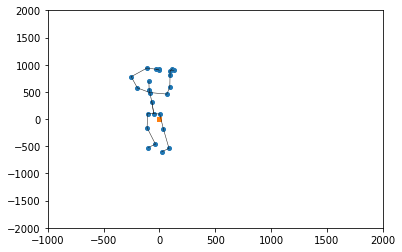

63


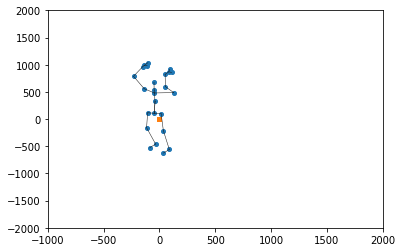

66


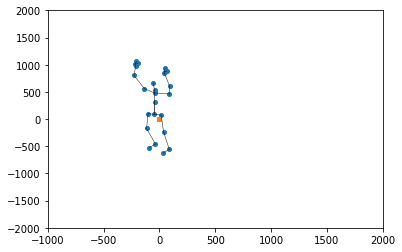

70


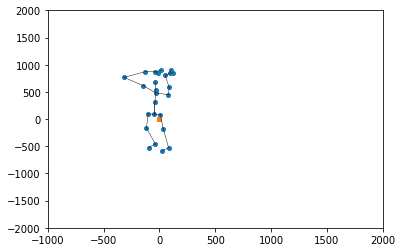

100


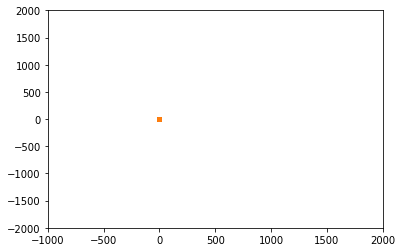

In [102]:
frame_item = data[8,:,:,:,:]
frame_visu_2d(frame_item, [60,63,66,70,100])

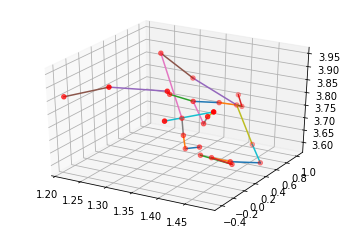